In [15]:
# binomial expansion
# (1+x)^n = 1 + n*x + (n*(n-1)/2*x^2) + (n*(n-1)*(n-2)/(2*3)*x^3) + ...

RAY = 1e27

# r = 1 + x
def binomial_approx(r, n):
    if r > RAY:
        x = r - RAY
        x1 = n * x
        x2 = x1 * ((n - 1) if n > 1 else 0) / 2 * x / RAY
        x3 = x2 * ((n - 2) if n > 2 else 0) / 3 * x / RAY
        return RAY + x1 + x2 + x3
    elif r < RAY:
        x = RAY - r
        x1 = n * x
        x2 = x1 * ((n - 1) if n > 1 else 0) / 2 * x / RAY
        x3 = x2 * ((n - 2) if n > 2 else 0) / 3 * x / RAY
        return RAY - x1 + x2 - x3
    else:
        return RAY

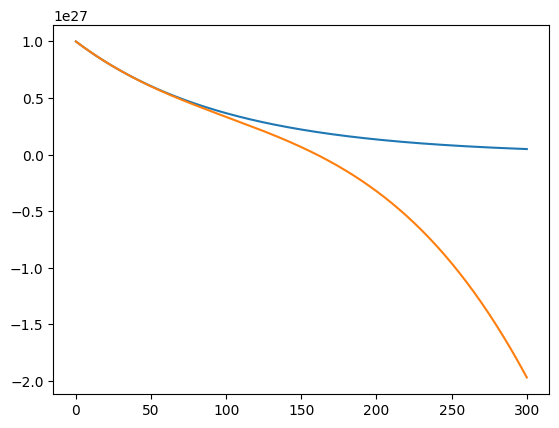

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 300
RAY = 1e27
x = -0.01 * RAY

y = RAY
ys = [y]
zs = [binomial_approx(0, 0)]

for i in range(N):
    y *= (RAY + x) / RAY
    z = binomial_approx((RAY + x), i + 1)
    ys.append(y)
    zs.append(z)

plt.plot(ys)
plt.plot(zs)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# aave weighted average
N = 1000
a = 1
b = 100
r0 = 0.05
r1 = 0.01

print(calc_rate(r0, r1, b, a * N))

def calc_rate(r0, r1, b, a):
    return (r0 * b + r1 * a) / (b + a)

rs = []
for i in range(N):
    r0 = calc_rate(r0, r1, b, a)
    b += a
    # print(r0, b)
    rs.append(r0)

print(rs[-1])

plt.plot(rs)
plt.show()